## Problem 2.24

In [9]:
# TODO: Add your imports
import random
import numpy as np
import matplotlib.pyplot as plt



### 2.24 (B)

In [3]:
def target_function(x):
    # TODO: implement target function
    return x**2

In [36]:
def random_data_sample():
    '''
    Generate a random data sample (x, y) where x is a random number in the range [-1, 1]

    Returns:
    x: random number in the range [-1, 1]
    y: target function value at x
    '''
    # Generate random number in the range [0, 1]
    random_number = random.random()

    # Scale and shift the random numbers to fit the interval [-1, 1]
    x = 2 * random_number - 1
    return x, target_function(x)

def generate_data_set(n=2):
    '''
    Generate n random data samples

    returns:
    D: list of n data samples [(x1,y1),(x2,y2),....(xn,yn)]
    '''
    # Generate Data Set (D): 2 data samples
    D = [random_data_sample() for _ in range(n)]

    return D  # [(x1,y1),(x2,y2),....(xn,yn)]


def generate_data_set_space(n=2,D_no=100):
    '''
    Generate D_no number of data sets of n data samples each

    returns:
    D_space: list of D_no data sets
    '''
    D_space = [generate_data_set(n) for _ in range(D_no)]

    return D_space  # [[(x1,y1),(x2,y2),....(xn,yn)],[...],....[...]]


def find_line_equation(point1, point2):
    '''
    Find the line equation given two points

    Args:
    point1: tuple (x1, y1)
    point2: tuple (x2, y2)

    Returns:
    a: slope of the line
    b: intercept of the line
    '''
    x1, y1 = point1
    x2, y2 = point2
    
    # Calculate the slope (a)
    a = (y2 - y1) / (x2 - x1)
    
    # Calculate the intercept (b)
    b = y1 - a * x1
    
    return a, b

# Function to compute y=ax+b
def compute_st_lne_eq(a,b,x):
    '''
    Compute the value of y for a given x using the equation y = a*x + b

    Args:
    a: slope of the line
    b: intercept of the line
    x: input value

    Returns:
    y: output value
    '''
    return a*x+b


def run_numerical_experiment(training_data_set_space,testing_data_set):
    '''
    Args:
    training_data_set_space : List of Data Sets D:  [[(x1,y1),(x2,y2)],[(x1,y1),(x2,y2)],....,[(x1,y1),(x2,y2)]]
    testing_data_set : Data Set D: [(x1,y1),(x2,y2),....,(xn,yn)]
    
    Returns:
    Eout : Expectation of the out of sample error over all hypothesis learned over the DataSet Space ED[Eout(g(D))] = ED[Ex [(g(D)(x) - f(x))^2]]
    g_bar : Average Hypothesis over the DataSet Space g_bar(x) = ED(g(D))
    bias : Bias Ex[(g_bar(x) - f(x))^2]
    '''
    #  Testing DataSet Space
    x=np.array([x for x,_ in testing_data_set])
    y_true=np.array([y for _,y in testing_data_set])

    # Initializes
    Eout=0
    g_bar_a,g_bar_b=0,0
    g_D=[] # List to store the hypothesis learned from each data set[Dk]

    for D in training_data_set_space:        
        # From Each Data Set D in the Training DataSet Space, Learn the hypothesis g(D)
        point_1,point_2=D[0],D[1]

        # Learn Function g(D) from the Data Set D [Training Data Set]
        g_D_a,g_D_b = find_line_equation(point_1,point_2)
        #  Save Learned Hypothesis g(D) from the Data Set D
        g_D.append((g_D_a,g_D_b))

        # 1. Compute the out of sample error E_out on model g(D)
        # Get y_pred for Testing DataSet from the learned hypothesis g(D)
        y_pred=compute_st_lne_eq(a=g_D_a,b=g_D_b,x=x)

        # Eout(g(D)) = Ex[(g(D)(x) - f(x))^2]
        error=np.sum((y_pred-y_true)**2)/len(y_true)
        Eout+=error

        # 2. Compute g_bar(x) from the Data Set Space
        g_bar_a+=g_D_a
        g_bar_b+=g_D_b

    # Compute the expectation of the out of sample error over all hypothesis learned over the DataSet Space
    # ED(Eout(g(D))) = ED[Ex [(g(D)(x) - f(x))^2]]
    Eout=Eout/len(training_data_set_space)

    # Compute the average hypothesis g_bar(x) over all hypothesis learned over the DataSet Space
    # g_bar(x)=ED(g(D)) :D
    g_bar_a=g_bar_a/len(training_data_set_space)
    g_bar_b=g_bar_b/len(training_data_set_space)
    g_bar= (g_bar_a,g_bar_b)

    # 3. compute the bias :D
    # bias = Ex[(g_bar(x) - f(x))^2]
    y_pred_g_bar=compute_st_lne_eq(a=g_bar_a,b=g_bar_b,x=x)
    bias=np.sum((y_pred_g_bar-y_true)**2)/len(y_true)
    
    # 4. Compute the variance :D
    # variance = Ex[ED[(g(D)(x) - g_bar(x))^2]]
    # variance = ED[EX[(g(D)(x) - g_bar(x))^2]]
    variance=0
    for i,D in enumerate(training_data_set_space):
        # Model g(D) from the Data Set D
        g_D_a,g_D_b=g_D[i]
        # Predictions on test Set
        y_pred=compute_st_lne_eq(a=g_D_a,b=g_D_b,x=x)

        y_bar=compute_st_lne_eq(a=g_bar_a,b=g_bar_b,x=x)
        variance+=np.sum((y_pred-y_bar)**2)/len(y_bar) #EX[(g(D)(x) - g_bar(x))^2]

    # Expectation on D Ex[ED[(g(D)(x) - g_bar(x))^2]]
    variance=variance/len(training_data_set_space)


    # For illustration Draw g(D) and g_bar :D
    x = np.linspace(-10, 10, 100) 
    for i,D in enumerate(training_data_set_space):
        # Model g(D) from the Data Set D
        g_D_a,g_D_b=g_D[i]
        y = compute_st_lne_eq(a=g_D_a,b=g_D_b,x=x)
        plt.plot(x, y,color="blue")

    # Plot the average hypothesis g_bar(x) over all hypothesis learned over the DataSet Space
    y = compute_st_lne_eq(a=g_bar_a,b=g_bar_b,x=x)
    plt.plot(x, y,color="red",label="g_bar")

    plt.title(f"Hypothesis Learned from {len(training_data_set_space)} Data Sets different")
    plt.legend()
    plt.show()

    return Eout,g_bar,bias,variance

### 2.24 (C)

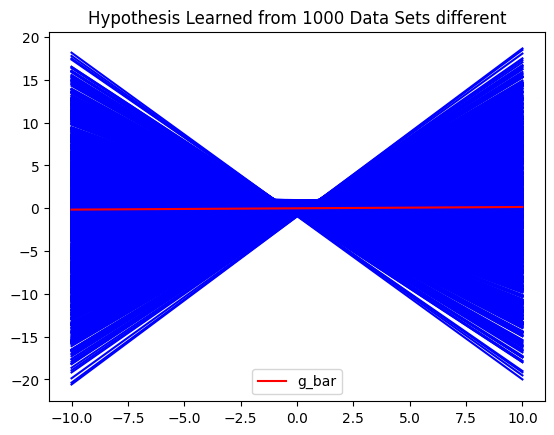

g_bar (0.015377357185320744, -0.00733471109640659)
Eout 0.6132423298386964
bias 0.2498917745571941
variance 0.3633505552815028
Eout= bias + variance


In [37]:
# TODO: Run experiment and calculate bias and variance (+ plotting)

# Training Data set Space each data set has 2 data samples  [Training is Done on one data set only ]
training_data_set_space=generate_data_set_space(n=2,D_no=1000)  # [[(x1,y1),(x2,y2)],[(x1,y1),(x2,y2)],....,[(x1,y1),(x2,y2)]]

# Testing Data set with n data samples
testing_data_set=generate_data_set_space(n=100,D_no=1)[0]  # [(x1,y1),(x2,y2),....(xn,yn)]

# Running Experiment with straight line as hypothesis set
Eout,g_bar,bias,variance=run_numerical_experiment(training_data_set_space=training_data_set_space,testing_data_set=testing_data_set)

print("g_bar",g_bar)
print("Eout",Eout)
print("bias",bias)
print("variance",variance)

assert Eout-bias-variance<1e-10
print("Eout= bias + variance")



#### Eout = Bias+ Variance 🙂 The lecture Main Objective

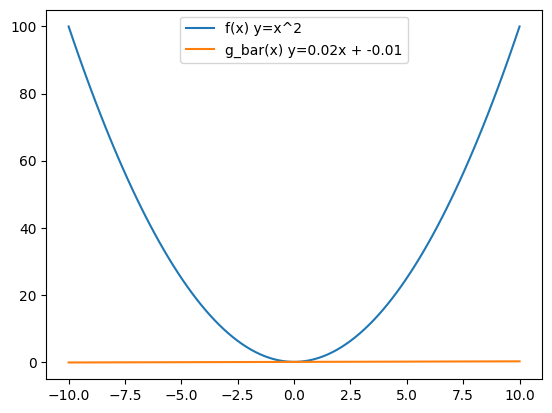

In [26]:
# Plotting
x = np.linspace(-10, 10, 100) 
# 1. f(x)
f_x=target_function(x)
plt.plot(x,f_x,label=f'f(x) y=x^2')
# 2. g_bar(x)
g_bar_y=compute_st_lne_eq(a=g_bar[0],b=g_bar[1],x=x)
# plt.plot(x,g_bar_y,label=f'g_bar(x) y={g_bar[0]}x+{g_bar[1]}')
plt.plot(x,g_bar_y,label=f'g_bar(x) y={g_bar[0]:.2f}x + {g_bar[1]:.2f}')

plt.legend()
plt.show()



#### Note 📝: g_bar makes perfect sense to be this line because always 2 points take for g_D are straight line of 2 points on the parabola  Show in Graph Above :D

### 2.24 (E)

In [ ]:
# TODO: Run experiment for quadratic hypothesis